<a href="https://colab.research.google.com/github/heesukjang/W209_DataViz_Summer2023/blob/main/Unit_Assignments/Week_08_Assignment_BubbleChart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## W209 Data Visualization, Summer 2023
**Week 8 Assignment<br>
Heesuk Jang**

In [ ]:
!pip install nx_altair

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import altair as alt
import pandas as pd
import numpy as np
import networkx as nx
import nx_altair as nxa
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.0f}'.format
pd.__version__

'1.5.3'

Graph with 30 nodes and 124 edges
len(graph.edges) = 124
len(graph.nodes) = 30


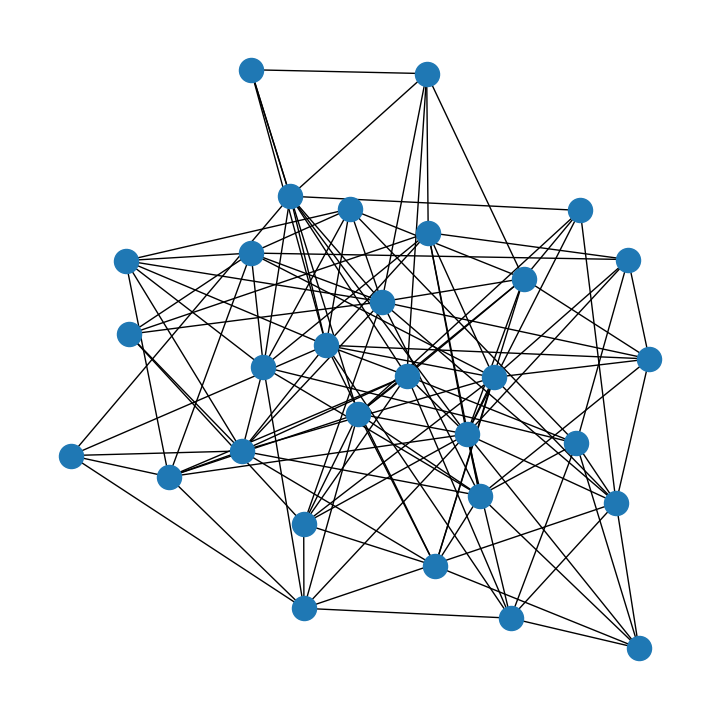

In [ ]:
plt.figure(figsize=(7,7))
graph = nx.fast_gnp_random_graph(n=30, p=0.25)    # random graph
print(f'{graph}\nlen(graph.edges) = {len(graph.edges)}\nlen(graph.nodes) = {len(graph.nodes)}')

nx.draw(graph)
plt.show()

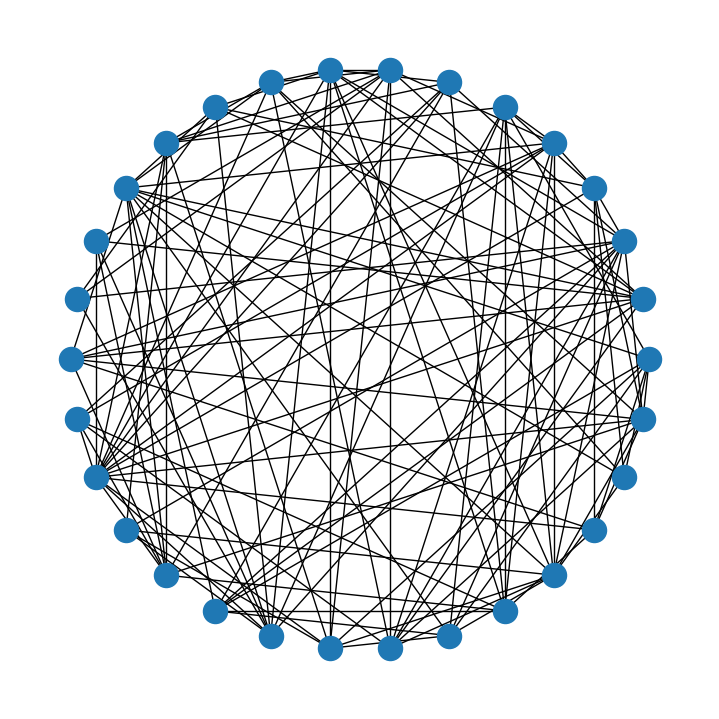

In [ ]:
plt.figure(figsize=(7,7))
nx.draw_circular(graph)
plt.show()

In [ ]:
# create a random network (Graph with 30 nodes and 99 edges)
g = nx.fast_gnp_random_graph(n=30, p=0.25)
print(g)

# compute positions for viz
pos = nx.spring_layout(g)
print(pos)

# add attributes to each node
for n in g.nodes():
  g.nodes[n]['weight'] = np.random.randn()
  g.nodes[n]['name'] = np.random.randint(1000)
  g.nodes[n]['viable'] = np.random.choice(['yes', 'no'])

# add attributes to edge
for e in g.edges:
  g.edges[(e[0], e[1])]['weight'] = np.random.uniform(1,10)


Graph with 30 nodes and 104 edges
{0: array([-0.35924231, -0.51875557]), 1: array([-0.53117387, -0.46141486]), 2: array([ 0.38302675, -0.70854727]), 3: array([ 0.06513897, -0.18894693]), 4: array([ 0.76039545, -0.19631448]), 5: array([ 0.40455747, -0.05856212]), 6: array([0.41220321, 0.29237751]), 7: array([-0.93826074, -0.49187858]), 8: array([0.70659783, 0.90055695]), 9: array([-0.93533306, -0.07254085]), 10: array([0.02255235, 1.        ]), 11: array([ 0.63923208, -0.59529147]), 12: array([-0.30403174,  0.96573095]), 13: array([ 0.04012689, -0.7709594 ]), 14: array([0.59353967, 0.56345197]), 15: array([-0.52803953,  0.12796321]), 16: array([-0.21218951,  0.31835996]), 17: array([-0.28714788, -0.91030834]), 18: array([0.90649019, 0.13319112]), 19: array([0.00691516, 0.06682713]), 20: array([ 0.42006324, -0.286535  ]), 21: array([-0.09676271,  0.66121665]), 22: array([-0.53226549,  0.33388052]), 23: array([0.10575478, 0.37001634]), 24: array([-0.21998916, -0.05365509]), 25: array([-0.

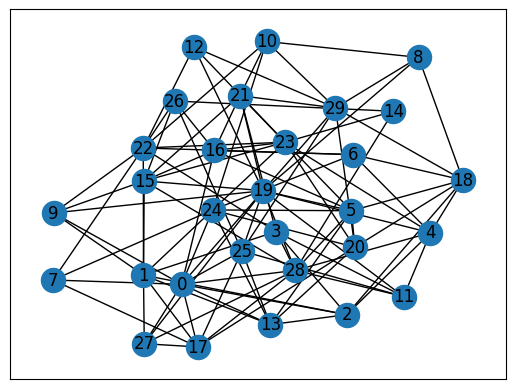

In [ ]:
# draw the graph using networkx
nx.draw_networkx(
    G=g,
    pos=pos
)

In [ ]:
nxa.draw_networkx(
    G=g,
    pos=pos
)

alt.LayerChart(...)

In [ ]:
nxa.draw_networkx(
    G=g,
    pos=pos,
    node_tooltip=['name', 'weight', 'viable']
).interactive()

alt.LayerChart(...)

In [ ]:
# leverage Altair
chart = nxa.draw_networkx(
    G=g,
    pos=pos,
    node_size=200,
    node_color='viable',
    cmap='viridis',
    width='weight',
    node_tooltip=['weight', 'name', 'viable']
)

In [ ]:
# get the node layer
edges=chart.layer[0]
nodes=chart.layer[1]
print(f'edges = {edges}\nnodes = {nodes}')

# build a brush
brush = alt.selection_interval(encodings=['x','y'])
color = alt.Color('viable:N', legend=None)
# print(f'brush = {brush}\ncolor = {color}')

# condition nodes based on brush
nodes = nodes.encode(
    fill=alt.condition(brush, color, alt.value('gray')),
).add_selection(
    brush
)

# create a bar graph to show highlighted nodes
bars = alt.Chart(nodes.data).mark_bar().encode(
    x=alt.X('count()', scale=alt.Scale(domain=(0,20))),
    y='viable',
    color='viable',
).transform_filter(
    brush
)

alt.vconcat(edges+nodes, bars)

edges = alt.Chart(...)
nodes = alt.Chart(...)


alt.VConcatChart(...)

You will likely have to upload the file `players_20.csv` to the workspace yourself.

In [ ]:
df = pd.read_csv("/content/players_20.csv")
print(df.columns)
df.head()

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


## Check the missing values

In [ ]:
print(df.shape)

if df[['nationality','sofifa_id','age']].isnull().values.any() == False:
  print('No Missing Values!')
else:
  print('There are Missing Values.')

(18278, 104)
No Missing Values!


## Group by Nationality and Count the Number of Players and Average the Age

In [ ]:
num_players_and_avg_age = df.groupby(['nationality']) \
          .agg({'sofifa_id':'count', 'age':'mean'}) \
          .rename(columns={'sofifa_id':'num_players', 'age':'avg_age'}) \
          .reset_index()

num_players_and_avg_age

,nationality,num_players,avg_age
0,Afghanistan,2,24
1,Albania,43,25
2,Algeria,50,27
3,Angola,16,26
4,Antigua & Barbuda,7,23
...,...,...,...
157,Venezuela,66,25
158,Vietnam,1,24
159,Wales,117,25
160,Zambia,10,23


## Sort by num_players in a descending order

In [ ]:
sorted_num_players_and_avg_age = num_players_and_avg_age.sort_values(by=['num_players'], ascending=False)
sorted_num_players_and_avg_age.reset_index(drop=True)

,nationality,num_players,avg_age
0,England,1667,24
1,Germany,1216,24
2,Spain,1035,26
3,France,984,24
4,Argentina,886,26
...,...,...,...
157,Malawi,1,26
158,Mauritius,1,30
159,St Lucia,1,25
160,South Sudan,1,26


## Top 20 countries with the most number of players

In [ ]:
sorted_num_players_and_avg_age.head(20).reset_index(drop=True)

,nationality,num_players,avg_age
0,England,1667,24
1,Germany,1216,24
2,Spain,1035,26
3,France,984,24
4,Argentina,886,26
5,Brazil,824,28
6,Italy,732,26
7,Colombia,591,26
8,Japan,453,26
9,Netherlands,416,24


In [ ]:
print(f'Average of Average Ages = {sorted_num_players_and_avg_age.avg_age.mean().round(10)}')

Average of Average Ages = 26.0370289707


The Pandas documentation [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#applying-multiple-functions-at-once) should be a useful reference.

# [Simple Chart Key Concepts](https://altair-viz.github.io/altair-tutorial/notebooks/02-Simple-Charts.html)
- Data, Marks, and Encodings: the three core pieces of an Altair chart

- Encoding Types, which drive the visual representation of the encodings:
  - Q (quantitative): Numerical quantity (real-valued)
  - N (nominal): Name / Unordered categorical
  - O (ordinal): Ordered categorial
  - T (temporal): Date/time

- Binning and Aggregation: which let you control aspects of the data representation within Altair.
- [Altair Chart Configuration](https://altair-viz.github.io/user_guide/configuration.html)

In [ ]:

distinct = df.club.unique()
print(len(distinct))
# print([col for col in df.columns if 'overall' in col or 'wage' in col or 'value' in col])
# print(df[['overall', 'value_eur','wage_eur']].info())
# print('overall: ', df.overall.unique())
# print('value_eur: ', df.value_eur.unique())
# print('wage_eur: ', df.wage_eur.unique())

698


# Aggregation using Pandas Groupby

In [ ]:
selected_df = df[['club','overall', 'value_eur', 'wage_eur', 'age']]
selected_df

,club,overall,value_eur,wage_eur,age
0,FC Barcelona,94,95500000,565000,32
1,Juventus,93,58500000,405000,34
2,Paris Saint-Germain,92,105500000,290000,27
3,Atlético Madrid,91,77500000,125000,26
4,Real Madrid,91,90000000,470000,28
...,...,...,...,...,...
18273,Beijing Renhe FC,48,40000,2000,22
18274,Shanghai SIPG FC,48,40000,2000,22
18275,Hebei China Fortune FC,48,40000,1000,19
18276,Shanghai Greenland Shenhua FC,48,40000,1000,18


In [ ]:
overall_score_by_club = selected_df.groupby('club').aggregate({'overall':'sum', 'value_eur':'mean', 'wage_eur':'mean', 'age':'mean'}).sort_values(by='overall',ascending=False).reset_index()
# print(any(overall_score_by_club.wage_eur==0.0))
# print(any(overall_score_by_club.overall==0))
overall_score_by_club = overall_score_by_club[(overall_score_by_club.wage_eur != 0)].reset_index(drop=True)   # remove rows if wage_eur = 0
print(overall_score_by_club.info())
overall_score_by_club

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   club       667 non-null    object 
 1   overall    667 non-null    int64  
 2   value_eur  667 non-null    float64
 3   wage_eur   667 non-null    float64
 4   age        667 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 26.2+ KB
None


,club,overall,value_eur,wage_eur,age
0,Real Madrid,2644,27207576,162242,25
1,Juventus,2642,22287121,113636,27
2,FC Barcelona,2586,26342424,150000,24
3,Chelsea,2543,15302121,85030,25
4,Manchester City,2541,25628636,120727,24
...,...,...,...,...,...
662,Shonan Bellmare,129,705000,2000,28
663,US Orléans Loiret Football,65,1200000,1000,19
664,GIF Sundsvall,63,280000,1000,32
665,Seongnam FC,60,220000,1000,25


# How are **total overall scores** of players related to their **wages** by **club**?

In [ ]:
alt.Chart(overall_score_by_club).mark_circle().encode(
    x=alt.X('overall:Q', axis=alt.Axis(title='Total Overall Score'), scale=alt.Scale(zero=False)),
    y=alt.Y('wage_eur:Q', axis=alt.Axis(title='Average Wage (Euro)'), scale=alt.Scale(zero=False)),
    color='club:N',
    tooltip=[alt.Tooltip('club', title='Club'),
             alt.Tooltip('overall', title= 'Total Overall Score', format=',.0f'),
             alt.Tooltip('wage_eur', title= 'Average Wage', format=',.0f')],
    size=alt.Size('wage_eur:Q', scale=alt.Scale(range=[50,800]))
).properties(
    width=600,
    height=400,
    title='Overall Score vs. Average Wage by Club'
).configure_axis(
    labelFontSize=15,
    titleFontSize=20
).configure_title(
  fontSize=24,
  color='black'
).interactive()

alt.Chart(...)

# How do **values** of players differ by their **ages**?

In [ ]:
alt.Chart(overall_score_by_club).mark_point().encode(
    x=alt.X('value_eur:Q', axis=alt.Axis(title='Average Value'), scale=alt.Scale(type='log')),   # logarithmic scales
    y=alt.Y('age:Q', axis=alt.Axis(title='Average Age'), scale=alt.Scale(zero=False)),
    color=alt.Color('wage_eur:N', legend=None),
    size=alt.Size('wage_eur:Q', scale=alt.Scale(range=[50,800])),
    tooltip=[alt.Tooltip('age', title='Average Age', format=',.0f'),
             alt.Tooltip('value_eur', title= 'Average Value', format=',.0f'),
             alt.Tooltip('wage_eur', title= 'Average Wage', format=',.0f')]
).properties(
    width=600,
    height=400,
    title='Average Value vs. Average Age by Wage'
).configure_axis(
    labelFontSize=15,
    titleFontSize=20,
    grid=False
).configure_title(
  fontSize=24,
  # font='Courier',
  color='black'
).configure_legend(
    strokeColor='gray',
    fillColor='#faf8f7',
    padding=10,
    cornerRadius=10
    # orient='top-right'
).interactive()

alt.Chart(...)